In [28]:
# Import required libraries

# Import visualisation modules
import matplotlib as mpl 
%matplotlib inline 
import matplotlib.pyplot as plt 

#Import modules
import osmnx as ox
import pandas as pd
import geopandas as gpd
import numpy as np
import contextily as ctx

#Import datareading modules
import fiona
import urllib
from urllib.request import urlopen
import csv
import os
import tempfile
import shutil
from pathlib import Path

import warnings 
warnings.simplefilter(action='ignore')
ox.__version__

'1.2.2'

In [3]:
# Load the Urban Area File
file = 'data/usa/california/urban08.geojson'
urban08 = gpd.read_file(file)

<AxesSubplot:>

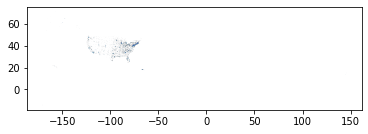

In [5]:
urban08.plot()

In [15]:
# Load the California Boundary - State
file = 'data/usa/california/ca-state-boundary/CA_State_TIGER2016.shp'
caliboundary = gpd.read_file(file)

<AxesSubplot:>

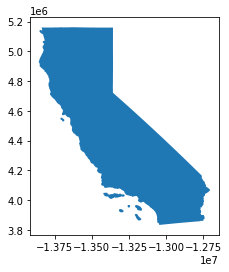

In [16]:
caliboundary.plot()

In [17]:
caliurban08 = urban08.sjoin(caliboundary, how="inner", predicate='intersects')

caliurban08.plot()

<AxesSubplot:>

ValueError: cannot convert float NaN to integer

<Figure size 432x288 with 1 Axes>

In [18]:
caliurban08 = gpd.overlay(urban08, caliboundary, how='intersection')

In [19]:
caliurban08.plot()

<AxesSubplot:>

ValueError: cannot convert float NaN to integer

<Figure size 432x288 with 1 Axes>

In [21]:
file = 'data/global/globalcrisis0616.xlsx'
df = pd.read_excel(file)

In [22]:
df.head()

,iso3,country,year,banking_crisis,inflation,currency_crisis
0,DZA,Algeria,2006,0.0,2.315,0
1,DZA,Algeria,2007,0.0,3.674,0
2,DZA,Algeria,2008,0.0,4.855,0
3,DZA,Algeria,2009,0.0,5.743,0
4,DZA,Algeria,2010,0.0,3.913,0


In [23]:
file = 'trial/data/collisions1601.geojson'
gdf = gpd.read_file(file)

In [24]:
gdf

,Injured,Killed,Factor1,Hour,Day,Casualty,geometry
0,1,0,Unspecified,18,Fri,1,POINT (-73.90661 40.74539)
1,0,0,Unspecified,19,Fri,0,POINT (-73.84274 40.87942)
2,0,0,Outside Car Distraction,19,Fri,0,POINT (-73.93133 40.66059)
3,0,0,Unspecified,19,Fri,0,POINT (-73.87037 40.73350)
4,0,0,Driver Inattention/Distraction,20,Fri,0,POINT (-73.84118 40.82852)
...,...,...,...,...,...,...,...
15268,0,0,Unspecified,20,Sun,0,POINT (-73.76279 40.66644)
15269,0,0,Unspecified,2,Sun,0,POINT (-73.96343 40.76186)
15270,0,0,Unspecified,11,Sat,0,POINT (-73.83452 40.73092)
15271,0,0,Unspecified,22,Fri,0,POINT (-74.00612 40.72375)


In [2]:
file = 'data/usa/fhafiledcasesbyyear.xls'
df = pd.read_excel(file)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1078 entries, 0 to 1077
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Calendar Year Filed    1078 non-null   int64 
 1   Violation State        1078 non-null   object
 2   Number of Filed Cases  1078 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 25.4+ KB


In [4]:
df

,Calendar Year Filed,Violation State,Number of Filed Cases
0,2000,Alabama,108
1,2000,Alaska,6
2,2000,Arizona,162
3,2000,Arkansas,67
4,2000,California,824
...,...,...,...
1073,2019,Washington,193
1074,2019,West Virginia,18
1075,2019,Wisconsin,68
1076,2019,Wyoming,5


In [ ]:
file = 'data/usa/hmda_2007_nationwide_all-records_labels.csv'
dfhmda = pd.read_csv(file)

In [ ]:
dfhmda.info()

In [5]:
file = 'data/usa/gz_2010_us_040_00_500k/gz_2010_us_040_00_500k.shp'
states_gdf = gpd.read_file(file)

<AxesSubplot:>

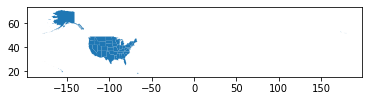

In [6]:
states_gdf.plot()

In [15]:
states_gdf.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US23,23,Maine,None,30842.923,"MULTIPOLYGON (((-67.61976 44.51975, -67.61541 ..."
1,0400000US25,25,Massachusetts,None,7800.058,"MULTIPOLYGON (((-70.83204 41.60650, -70.82373 ..."
2,0400000US26,26,Michigan,None,56538.901,"MULTIPOLYGON (((-88.68443 48.11578, -88.67563 ..."
3,0400000US30,30,Montana,None,145545.801,"POLYGON ((-104.05770 44.99743, -104.25015 44.9..."
4,0400000US32,32,Nevada,None,109781.180,"POLYGON ((-114.05060 37.00040, -114.04999 36.9..."


In [8]:
# rename the states
df.rename(columns={'Violation State': 'NAME'}, inplace=True)

<AxesSubplot:>

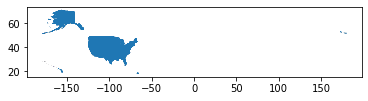

In [9]:
# Join housing file cases data with USA boundary by attribute NAME
filed_gdf = states_gdf.merge(df, on = 'NAME', how = 'left')
filed_gdf.plot()

In [12]:
filed_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1038 entries, 0 to 1037
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   GEO_ID                 1038 non-null   object  
 1   STATE                  1038 non-null   object  
 2   NAME                   1038 non-null   object  
 3   LSAD                   0 non-null      object  
 4   CENSUSAREA             1038 non-null   float64 
 5   geometry               1038 non-null   geometry
 6   Calendar Year Filed    1038 non-null   int64   
 7   Number of Filed Cases  1038 non-null   int64   
dtypes: float64(1), geometry(1), int64(2), object(4)
memory usage: 73.0+ KB


# Crisis

In [53]:
file = 'data/global/globalcrisis0616.xlsx'
crisis = pd.read_excel(file)

In [54]:
crisis

,iso3,country,year,item,values
0,DZA,Algeria,2006,banking,0.0
1,DZA,Algeria,2007,banking,0.0
2,DZA,Algeria,2008,banking,0.0
3,DZA,Algeria,2009,banking,0.0
4,DZA,Algeria,2010,banking,0.0
...,...,...,...,...,...
2305,ZWE,Zimbabwe,2012,currency,0.0
2306,ZWE,Zimbabwe,2013,currency,0.0
2307,ZWE,Zimbabwe,2014,currency,0.0
2308,ZWE,Zimbabwe,2015,currency,0.0


In [56]:
# rename the country
crisis.rename(columns={'values': 'value'}, inplace=True)

In [61]:
# rename the country
crisis.rename(columns={'country': 'COUNTRY'}, inplace=True)

In [62]:
crisis.head()

,iso3,COUNTRY,year,item,value
0,DZA,Algeria,2006,banking,0.0
1,DZA,Algeria,2007,banking,0.0
2,DZA,Algeria,2008,banking,0.0
3,DZA,Algeria,2009,banking,0.0
4,DZA,Algeria,2010,banking,0.0


In [70]:
crisis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2310 entries, 0 to 2309
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   iso3     2310 non-null   object 
 1   COUNTRY  2310 non-null   object 
 2   year     2310 non-null   int64  
 3   item     2310 non-null   object 
 4   value    2144 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 90.4+ KB


In [73]:
crisis = crisis.dropna(subset=['value'])

In [74]:
crisis

,iso3,COUNTRY,year,item,value
0,DZA,Algeria,2006,banking,0.0
1,DZA,Algeria,2007,banking,0.0
2,DZA,Algeria,2008,banking,0.0
3,DZA,Algeria,2009,banking,0.0
4,DZA,Algeria,2010,banking,0.0
...,...,...,...,...,...
2305,ZWE,Zimbabwe,2012,currency,0.0
2306,ZWE,Zimbabwe,2013,currency,0.0
2307,ZWE,Zimbabwe,2014,currency,0.0
2308,ZWE,Zimbabwe,2015,currency,0.0


In [58]:
file = 'data/global/World_Countries/World_Countries__Generalized_.shp'
world_gdf = gpd.read_file(file)

<AxesSubplot:>

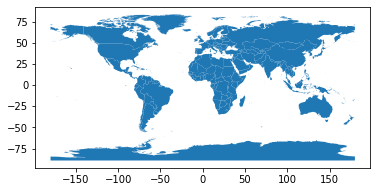

In [59]:
world_gdf.plot()

In [60]:
world_gdf.head()

,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Leng,SHAPE_Area,geometry
0,1,Afghanistan,AF,Afghanistan,AF,50.803210,62.566714,"POLYGON ((61.27655 35.60725, 61.29638 35.62854..."
1,2,Albania,AL,Albania,AL,9.625038,3.073540,"POLYGON ((19.57083 41.68527, 19.58195 41.69569..."
2,3,Algeria,DZ,Algeria,DZ,70.540082,213.513461,"POLYGON ((4.60335 36.88791, 4.63555 36.88638, ..."
3,4,American Samoa,AS,United States,US,0.600124,0.013720,"POLYGON ((-170.74390 -14.37555, -170.74942 -14..."
4,5,Andorra,AD,Andorra,AD,0.937352,0.055585,"POLYGON ((1.44584 42.60194, 1.48653 42.65042, ..."


<AxesSubplot:>

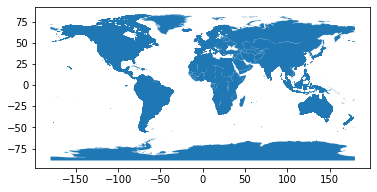

In [75]:
# Join global crisis data with world boundary by attribute COUNTRY
crisis_gdf = world_gdf.merge(crisis, on = 'COUNTRY', how = 'left')
crisis_gdf.plot()

In [76]:
crisis_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   FID         2175 non-null   int64   
 1   COUNTRY     2175 non-null   object  
 2   ISO         2175 non-null   object  
 3   COUNTRYAFF  2174 non-null   object  
 4   AFF_ISO     2174 non-null   object  
 5   SHAPE_Leng  2175 non-null   float64 
 6   SHAPE_Area  2175 non-null   float64 
 7   geometry    2175 non-null   geometry
 8   iso3        1989 non-null   object  
 9   year        1989 non-null   float64 
 10  item        1989 non-null   object  
 11  value       1989 non-null   float64 
dtypes: float64(4), geometry(1), int64(1), object(6)
memory usage: 220.9+ KB


In [77]:
#Export merged geodataframe into shapefile
crisis_gdf.to_file("data/global/crisis.geojson")

In [ ]:
#using plotly for an animated choropleth map
import plotly.express as px
fig = px.choropleth_mapbox(data_frame=df,
                           geojson=neighbourhoods_json,
                           locations=df.neighbourhood,
                           color='% plowed',
                           center={'lat':43.72, 'lon':-79.38},
                           mapbox_style='lights',
                           zoom=9,
                           color_continuous_scale='blues',
                           range_color=(0, 50),
                           animation_frame='Day and Hour',
                           width=800,
                           height=600)
fig.write_html('plow_map.html')
fig.show()

# Housing Filed Cases

In [16]:
file = 'data/usa/housing_filed_cases.csv'
df = pd.read_csv(file)

In [17]:
df

,Unnamed: 0,AREA,PERIMETER,ST99_D00_,ST99_D00_I,STATE,NAME,LSAD,REGION,DIVISION,...,Number of Administrative Closures,Number of Conciliations and Settlements,Number of Withdrawals after Resolution,Number of No Reasonable Cause Determinations,Number of Department of Justice Closures,Number of Post-Cause Closures by State and Local Partner Agencies,Number of Administrative Law Judge Closures,Number of Elections to Federal District Court,Number of Appeals or Supreme Court Closures,Number of Open Cases
0,0,271.25438,227.17142,2,1,2,Alaska,1,4.0,9.0,...,2.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,271.25438,227.17142,2,1,2,Alaska,1,4.0,9.0,...,NaN,3.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2,271.25438,227.17142,2,1,2,Alaska,1,4.0,9.0,...,NaN,1.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
3,3,271.25438,227.17142,2,1,2,Alaska,1,4.0,9.0,...,1.0,NaN,1.0,7.0,NaN,NaN,NaN,1.0,NaN,NaN
4,4,271.25438,227.17142,2,1,2,Alaska,1,4.0,9.0,...,1.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5293,5293,0.00013,0.05466,274,273,72,Puerto Rico,1,NaN,NaN,...,5.0,27.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,1.0
5294,5294,0.00013,0.05466,274,273,72,Puerto Rico,1,NaN,NaN,...,1.0,30.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,1.0
5295,5295,0.00013,0.05466,274,273,72,Puerto Rico,1,NaN,NaN,...,3.0,26.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
5296,5296,0.00013,0.05466,274,273,72,Puerto Rico,1,NaN,NaN,...,3.0,41.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5298 entries, 0 to 5297
Data columns (total 44 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Unnamed: 0                                                            5298 non-null   int64  
 1   AREA                                                                  5298 non-null   float64
 2   PERIMETER                                                             5298 non-null   float64
 3   ST99_D00_                                                             5298 non-null   int64  
 4   ST99_D00_I                                                            5298 non-null   int64  
 5   STATE                                                                 5298 non-null   int64  
 6   NAME                                                                  5298 non-null   object 
 7

In [34]:
df = df[["Calendar Year Filed","Number of Filed Cases", "NAME"]]

In [36]:
df.head()

,Calendar Year Filed,Number of Filed Cases,NAME
0,2000,6,Alaska
1,2001,6,Alaska
2,2002,4,Alaska
3,2003,10,Alaska
4,2004,7,Alaska


In [39]:
# rename the country
df.rename(columns={'Calendar Year Filed': 'year'}, inplace=True)

In [44]:
df.rename(columns={'Number of Filed Cases':'value'}, inplace=True)

In [45]:
df.head()

,year,values,NAME
0,2000,6,Alaska
1,2001,6,Alaska
2,2002,4,Alaska
3,2003,10,Alaska
4,2004,7,Alaska


<AxesSubplot:>

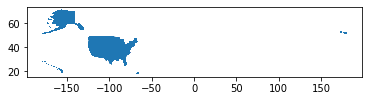

In [46]:
# Join housing file cases data with USA boundary by attribute NAME
filed_gdf = states_gdf.merge(df, on = 'NAME', how = 'left')
filed_gdf.plot()

In [47]:
filed_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 5298 entries, 0 to 5297
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   GEO_ID      5298 non-null   object  
 1   STATE       5298 non-null   object  
 2   NAME        5298 non-null   object  
 3   LSAD        0 non-null      object  
 4   CENSUSAREA  5298 non-null   float64 
 5   geometry    5298 non-null   geometry
 6   year        5298 non-null   int64   
 7   values      5298 non-null   int64   
dtypes: float64(1), geometry(1), int64(2), object(4)
memory usage: 372.5+ KB


In [48]:
#Export merged geodataframe into shapefile
filed_gdf.to_file("data/usa/housing.geojson")

In [30]:
file = ("map2-timeslider/small_map.geojson")
smallmap = gpd.read_file(file)

In [32]:
smallmap.head()

,id,Country,item,value,year,geometry
0,0,Fiji,tea,159.0,2019,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,1,Fiji,coffee,753.0,2016,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
2,2,Fiji,coffee,696.0,2019,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
3,3,Fiji,total,45619946.0,2010,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
4,4,Fiji,total,85189258.0,2011,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."


In [33]:
smallmap.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5089 entries, 0 to 5088
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   id        5089 non-null   object  
 1   Country   5089 non-null   object  
 2   item      5089 non-null   object  
 3   value     5089 non-null   float64 
 4   year      5089 non-null   object  
 5   geometry  5089 non-null   geometry
dtypes: float64(1), geometry(1), object(4)
memory usage: 238.7+ KB


In [49]:
file = ("trial/data/collisions1601.geojson")
collisions = gpd.read_file(file)

In [50]:
collisions.head()

,Injured,Killed,Factor1,Hour,Day,Casualty,geometry
0,1,0,Unspecified,18,Fri,1,POINT (-73.90661 40.74539)
1,0,0,Unspecified,19,Fri,0,POINT (-73.84274 40.87942)
2,0,0,Outside Car Distraction,19,Fri,0,POINT (-73.93133 40.66059)
3,0,0,Unspecified,19,Fri,0,POINT (-73.87037 40.73350)
4,0,0,Driver Inattention/Distraction,20,Fri,0,POINT (-73.84118 40.82852)
